# Sistem rekomendasi buku

## Data Understanding

Untuk dapat membangun sistem rekomendasi buku, kita memerlukan dataset terlebih dahulu. Kali ini, kita mengambil data dari [Kaggle](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset). 

In [2]:
import pandas as pd
import numpy as np

books = pd.read_csv('data/BX_Books.csv', sep=';', encoding='latin-1')
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', encoding='latin-1')
users = pd.read_csv('data/BX-Users.csv', sep=';', encoding='latin-1')

**Insight** : Dataset yang kita miliki terdiri dari 3 file, yaitu:
- BX_Books.csv : Berisi informasi seputar buku yang tersedia pada dataset
- BX-Book-Ratings.csv : Berisi informasi seputar rating yang dilakukan user terhadap suatu buku
- BX-Users.csv : Berisi informasi seputar user yang tersedia pada dataset

Informasi mengenai datasetnya sendiri yaitu terdiri dari 278,858 users anonim tetapi dengan informasi demografi yang menyediakan 1,149,780 ratings (explicit / implicit) tentang 271,379 books.

In [3]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


**Insight** : Pada books dataframe terdapat beberapa kolom seputar identitas buku.
- ISBN : International Standard Book Number
- Book-Title : Judul buku
- Book-Author : Penulis buku
- Year-Of-Publication : Tahun terbit
- Publisher : Penerbit
- Image-URL-S : Link gambar berukuran kecil
- Image-URL-M : Link gambar berukuran sedang
- Image-URL-L : Link gambar berukuran besar

In [4]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


**Insight** : Pada ratings dataframe terdapat kolom tentang rating yang dilakukan user pada suatu buku.
- User-ID : ID user/pembaca
- ISBN : International Standard Book Number
- Book-Rating : Skor yang diberikan pengguna

In [5]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


**Insight** : Pada user dataframe terdapat informasi user yang melakukan rating.
- User-ID : ID user/pembaca
- Location : Lokasi user
- Age : Usia user

In [6]:
print('Jumlah buku:', len(books.ISBN.unique()))
print('Jumlah rating:', ratings.shape[0] - ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Jumlah user:', len(users['User-ID'].unique()))

Jumlah buku: 271379
Jumlah rating: 1149780
Jumlah user: 278858


**Insight** : Data yang terdapat pada dataset ini sangat besar. Dataset mencakup 271.379 buku, 1.1497.780 rating, dan 278.858 user.

In [7]:
ratings.duplicated(subset=['User-ID', 'ISBN']).sum()

np.int64(0)

**Insight** : Dari jumlah data yang sangat besar, tidak ditemukan adanya duplikasi data.

Karena keterbatasan sumber daya, kita akan melakukan sampling terlebih dahulu untuk melakukan eksplorasi lebih lanjut. Kita akan melakukan sampling dengan menggunakan library numpy fungsi random.choice(). Ukuran sampling yang digunakan adalah 10.000 data.

In [8]:
sampled_books = np.random.choice(books.ISBN.unique(), size=10000, replace=False)
subset_books = books[books.ISBN.isin(sampled_books)]

In [9]:
subset_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
42,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...
51,0842342702,Left Behind: A Novel of the Earth's Last Days ...,Tim Lahaye,2000,Tyndale House Publishers,http://images.amazon.com/images/P/0842342702.0...,http://images.amazon.com/images/P/0842342702.0...,http://images.amazon.com/images/P/0842342702.0...
53,0060914068,"Love, Medicine and Miracles",M.D. Bernie S. Siegel,1988,HarperCollins Publishers,http://images.amazon.com/images/P/0060914068.0...,http://images.amazon.com/images/P/0060914068.0...,http://images.amazon.com/images/P/0060914068.0...
109,0671864769,Relics (Star Trek: The Next Generation),Michael Jan Friedman,1992,Star Trek,http://images.amazon.com/images/P/0671864769.0...,http://images.amazon.com/images/P/0671864769.0...,http://images.amazon.com/images/P/0671864769.0...
...,...,...,...,...,...,...,...,...
271197,0816705739,"Good Luck, Bad Luck (Happy Times Adventures)",Rita Schlachter,1986,Troll Communications,http://images.amazon.com/images/P/0816705739.0...,http://images.amazon.com/images/P/0816705739.0...,http://images.amazon.com/images/P/0816705739.0...
271217,1864486341,Resilience,Anne Deveson,2003,Allen and Unwin,http://images.amazon.com/images/P/1864486341.0...,http://images.amazon.com/images/P/1864486341.0...,http://images.amazon.com/images/P/1864486341.0...
271287,0310702631,Horse Crazy Lily (Young Women of Faith: Lily S...,Nancy N. Rue,2003,Zonderkidz,http://images.amazon.com/images/P/0310702631.0...,http://images.amazon.com/images/P/0310702631.0...,http://images.amazon.com/images/P/0310702631.0...
271311,0140375376,Escape from Egypt: A Novel,Sonia Levitin,1996,Puffin Books,http://images.amazon.com/images/P/0140375376.0...,http://images.amazon.com/images/P/0140375376.0...,http://images.amazon.com/images/P/0140375376.0...


**Insight** : Berhasil melakukan sampling dataframe books dengan 10.000 data.

In [10]:
sampled_users = np.random.choice(users['User-ID'].unique(), size=10000, replace=False)
subset_users = users[users['User-ID'].isin(sampled_users)]

In [11]:
subset_users

,User-ID,Location,Age
3,4,"porto, v.n.gaia, portugal",17.0
37,38,"viterbo, lazio, italy",34.0
49,50,"london, england, united kingdom",17.0
95,96,"helsinki, alaska, finland",NaN
96,97,"mechanicsburg, pennsylvania, usa",NaN
...,...,...,...
278741,278742,"beijing, china, china",22.0
278795,278796,"baxter springs, kansas, usa",34.0
278802,278803,"shanghai, shanghai, china",24.0
278805,278806,"la jolla, california, usa",NaN


**Insight** : Berhasil melakukan sampling dataframe users dengan 10.000 data.

In [12]:
subset_ratings = ratings[
    (ratings.ISBN.isin(sampled_books)) & 
    (ratings['User-ID'].isin(sampled_users))
].drop_duplicates(subset=['User-ID', 'ISBN'])

subset_ratings

,User-ID,ISBN,Book-Rating
3158,277945,0515118249,0
3160,277945,051512317X,7
4193,278314,0688180191,0
9193,278621,1550390961,8
9907,232,0671504282,6
...,...,...,...
1144324,275154,0609802429,8
1144455,275210,0393324354,0
1144474,275210,0971880107,0
1144477,275210,2290323551,5


**Insight** : Berhasil melakukan sampling dataframe rating yang memiliki buku dan user yang telah dilakukan sampling.

In [13]:
print('Dataset subset:')
print('Jumlah buku:', len(subset_books.ISBN.unique()))
print('Jumlah rating:', len(subset_ratings))
print('Jumlah user:', len(subset_users['User-ID'].unique()))

Dataset subset:
Jumlah buku: 10000
Jumlah rating: 1574
Jumlah user: 10000


**Insight** : Setelah sampling, data yang dimiliki adalah 10.000 jenis buku, 1.545 data rating, dan 10.000 jumlah user.

### Univariate Exploratory Data Analysis

- books = buku yang tersedia pada dataset
- ratings = penilaian buku oleh user
- users = data user

#### Books Variable

In [14]:
subset_books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 26 to 271357
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 10000 non-null  object
 1   Book-Title           10000 non-null  object
 2   Book-Author          10000 non-null  object
 3   Year-Of-Publication  10000 non-null  int64 
 4   Publisher            10000 non-null  object
 5   Image-URL-S          10000 non-null  object
 6   Image-URL-M          10000 non-null  object
 7   Image-URL-L          10000 non-null  object
dtypes: int64(1), object(7)
memory usage: 703.1+ KB


In [15]:
print('Banyak data:', len(subset_books.ISBN.unique()))
print('Judul buku yang tersedia:', subset_books['Book-Title'].unique())

Banyak data: 10000
Judul buku yang tersedia: ['Wild Animus'
 'The Therapeutic Touch: How to Use Your Hands to Help or to Heal'
 "Left Behind: A Novel of the Earth's Last Days (Left Behind #1)" ...
 'Horse Crazy Lily (Young Women of Faith: Lily Series, Book 11)'
 'Escape from Egypt: A Novel'
 "Christie's Collectables: Blue and White China (Christie's Collectables)"]


**Insight** : Dataframe subset_books terdiri dari 7 data kategorikal dan 1 data numerik.

#### Ratings Variable

In [16]:
subset_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1574 entries, 3158 to 1148406
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      1574 non-null   int64 
 1   ISBN         1574 non-null   object
 2   Book-Rating  1574 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 49.2+ KB


In [17]:
print('Banyak data:', subset_ratings.shape[0] - subset_ratings.duplicated(subset=['User-ID', 'ISBN']).sum())
print('Nilai rating yang ada pada dataset:', np.sort(subset_ratings['Book-Rating'].unique()))
print('Banyak user yang memberikan rating:', len(subset_ratings['User-ID'].unique()))

Banyak data: 1574
Nilai rating yang ada pada dataset: [ 0  1  2  3  4  5  6  7  8  9 10]
Banyak user yang memberikan rating: 571


**Insight** : Dataframe subset_ratings terdiri dari 2 data numerik dan 1 data kategorikal. Rating berada pada range 0 hingga 10.

In [18]:
subset_ratings.describe()

,User-ID,Book-Rating
count,1574.000000,1574.000000
mean,148407.122618,2.584498
std,81627.780192,3.712855
min,232.000000,0.000000
25%,75389.000000,0.000000
50%,145702.000000,0.000000
75%,226745.000000,6.000000
max,278621.000000,10.000000


**Insight** : Data pada User-ID dan Book rating memiliki jumlah yang sama yaitu 1545. Dapat dilihat bahwa nilai Book-Rating sebagian besar merupakan nilai 0 karena data minimal hingga mediannya bernilai 0.

#### Users Variable

In [19]:
subset_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3 to 278856
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User-ID   10000 non-null  int64  
 1   Location  10000 non-null  object 
 2   Age       6025 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 312.5+ KB


In [20]:
print('Banyak data:', len(subset_users['User-ID'].unique()))
print('User yang ada pada dataset:', subset_users['User-ID'].unique())

Banyak data: 10000
User yang ada pada dataset: [     4     38     50 ... 278803 278806 278857]


**Insight** : Dataframe subset_users memiliki 2 data numerik dan 1 data kategorikal dengan jumlah 10.000 data.

### Exploratory Data Analysis

#### Top 20 Books

In [21]:
Unique_title = pd.unique(subset_books['Book-Title'].values.ravel())
print("Number of Unique values: ",subset_books['Book-Title'].nunique())
Value_Unique_title = subset_books['Book-Title'].value_counts()
Value_Unique_title.head(50)

Number of Unique values:  9936


Book-Title
The Experiment                                                                       2
Getting Even                                                                         2
La judÃ­a de Toledo                                                                  2
Tell Me No Lies                                                                      2
The Good Children                                                                    2
Moby Dick                                                                            2
Dark Angel                                                                           2
Discrete Mathematics and Its Applications                                            2
Caps for Sale: A Tale of a Peddler, Some Monkeys and Their Monkey Business           2
Toward Amnesia                                                                       2
To Die for                                                                           2
The Trading Game                

**Insight** : Dari 10.000 data buku, terdapat 9.992 judul buku yang unik. Namun, itu bukan berarti ada duplikasi data, karena data dengan judul tersebut dapat memiliki Author, Tahun terbit, hingga Penerbit yang berbeda.

Text(0.5, 1.0, 'Top 20 Books - Count')

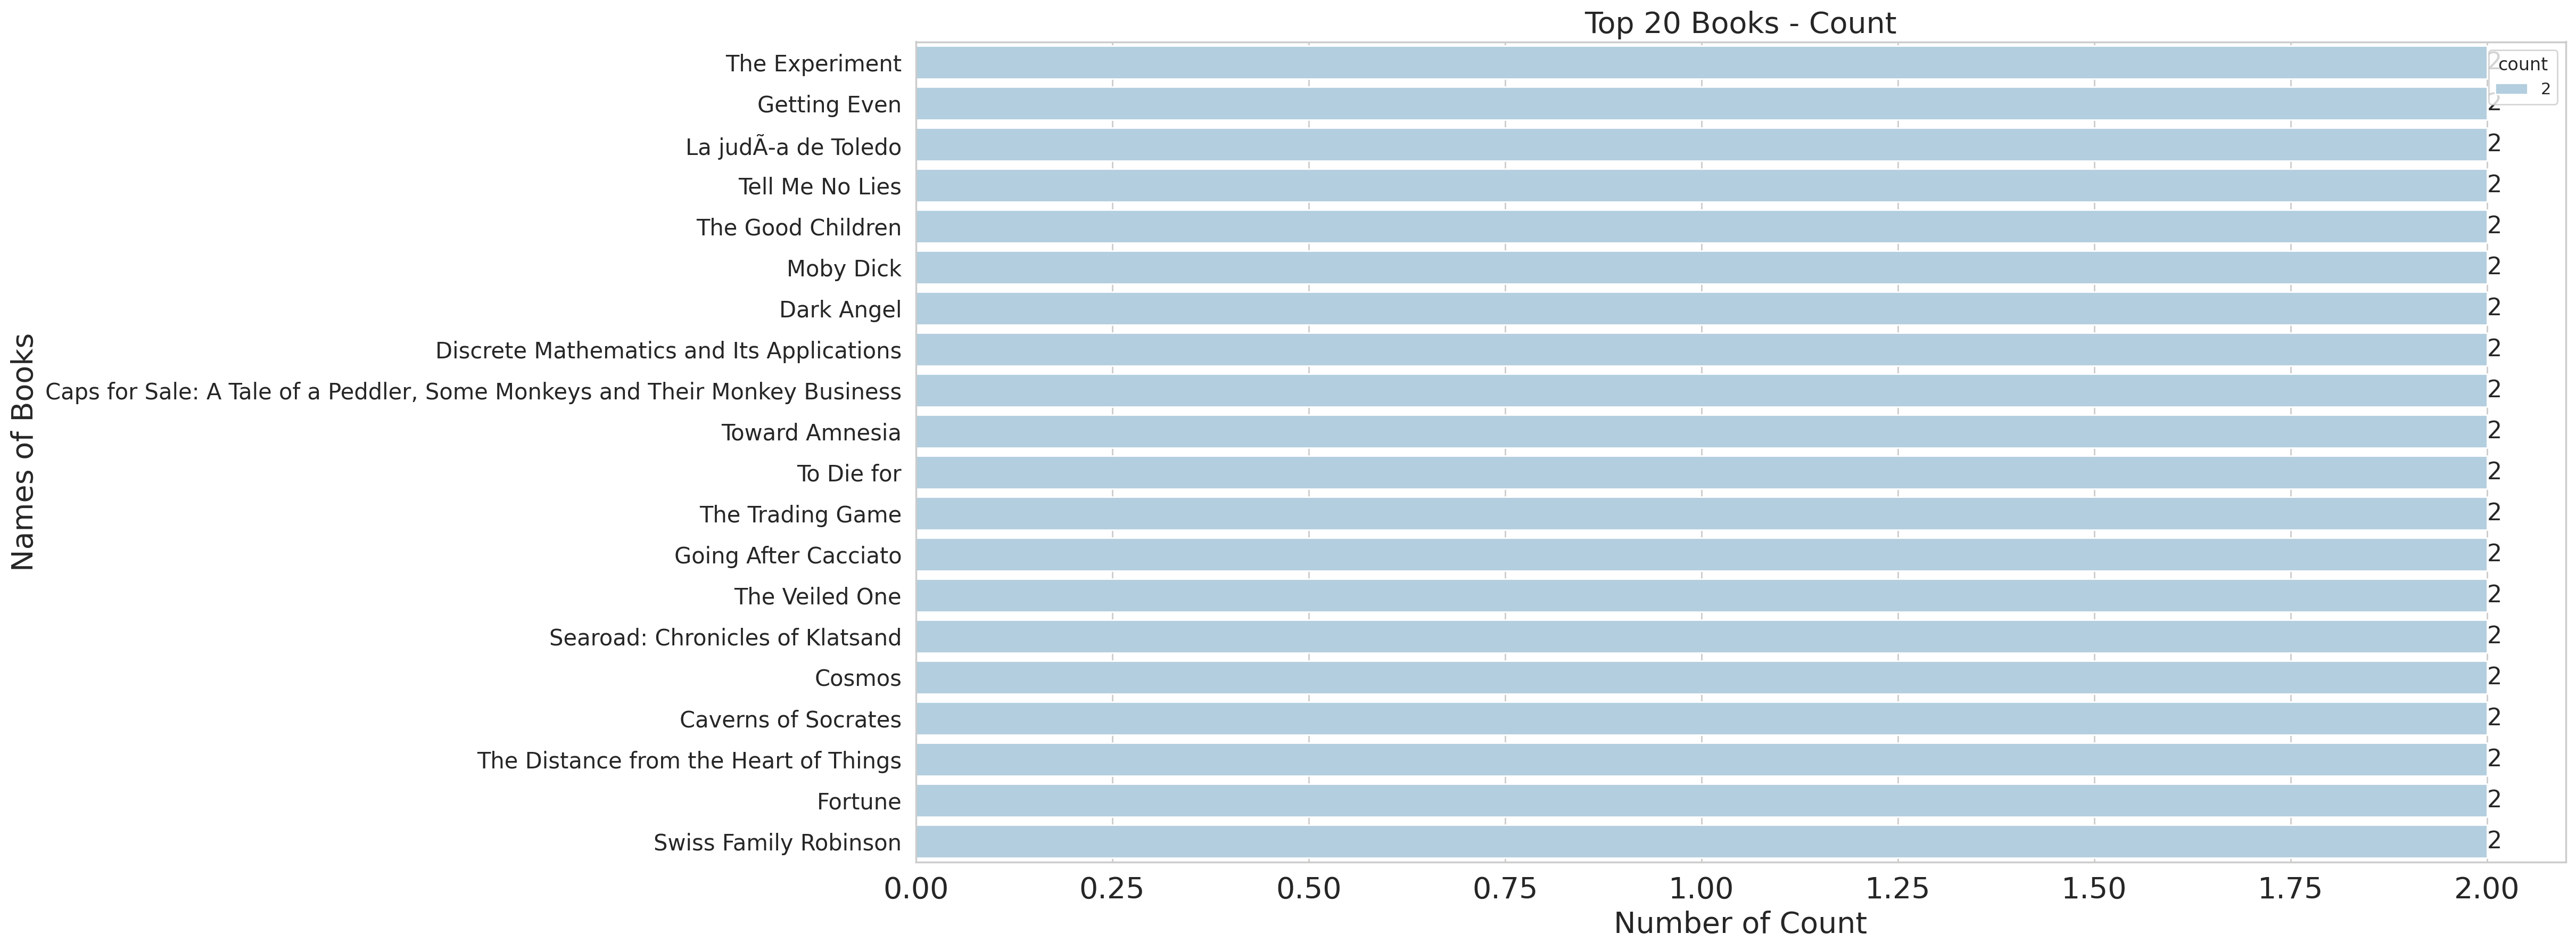

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_books = subset_books['Book-Title'].value_counts()[:20]
ax = sns.barplot(x= Top_20_books, y= Top_20_books.index, palette="Blues_d", hue=Top_20_books)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Books", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Books - Count", fontsize= 20)

**Insight** : Ada 4 buku yang memiliki judul yang sama terbanyak yaitu sebanyak 3 buah. Judul yang dimaksud adalah The Secret Garden, The Mask, The Outsider, dan Legacy.

#### Top 20 Authors

In [23]:
Unique_author = pd.unique(subset_books['Book-Author'].values.ravel())
print("Number of Unique values: ",subset_books['Book-Author'].nunique())
Value_Unique_author = subset_books['Book-Author'].value_counts()
Value_Unique_author.head(50)

Number of Unique values:  8103


Book-Author
Stephen King            24
William Shakespeare     21
Agatha Christie         19
Ann M. Martin           19
Mark Twain              16
Francine Pascal         13
Isaac Asimov            13
Carolyn Keene           13
Nora Roberts            12
Barbara Cartland        12
Charles Dickens         11
Janet Dailey            10
Mary Higgins Clark      10
John Grisham             9
Andre Norton             9
Enid Blyton              9
Marie Ferrarella         9
Jane Austen              9
Diana Palmer             9
Not Applicable (Na )     8
Don Pendleton            8
Ruth Rendell             8
Anne McCaffrey           8
Tom Clancy               7
Janette Oke              7
Franz Kafka              7
Anita Shreve             7
Dick Francis             7
Piers Anthony            7
J. R. R. Tolkien         7
Barbara Delinsky         7
R. L. Stine              7
Oscar Wilde              7
Jim Davis                7
Marion Chesney           7
Lawrence Sanders         6
D. H. Lawrence  

**Insight** : Dari 10.000 data, ada sebanyak 8.027 data Author unik. Agatha Christie memiliki data terbanyak yaitu sebanyak 29.

Text(0.5, 1.0, 'Top 20 Author - Count')

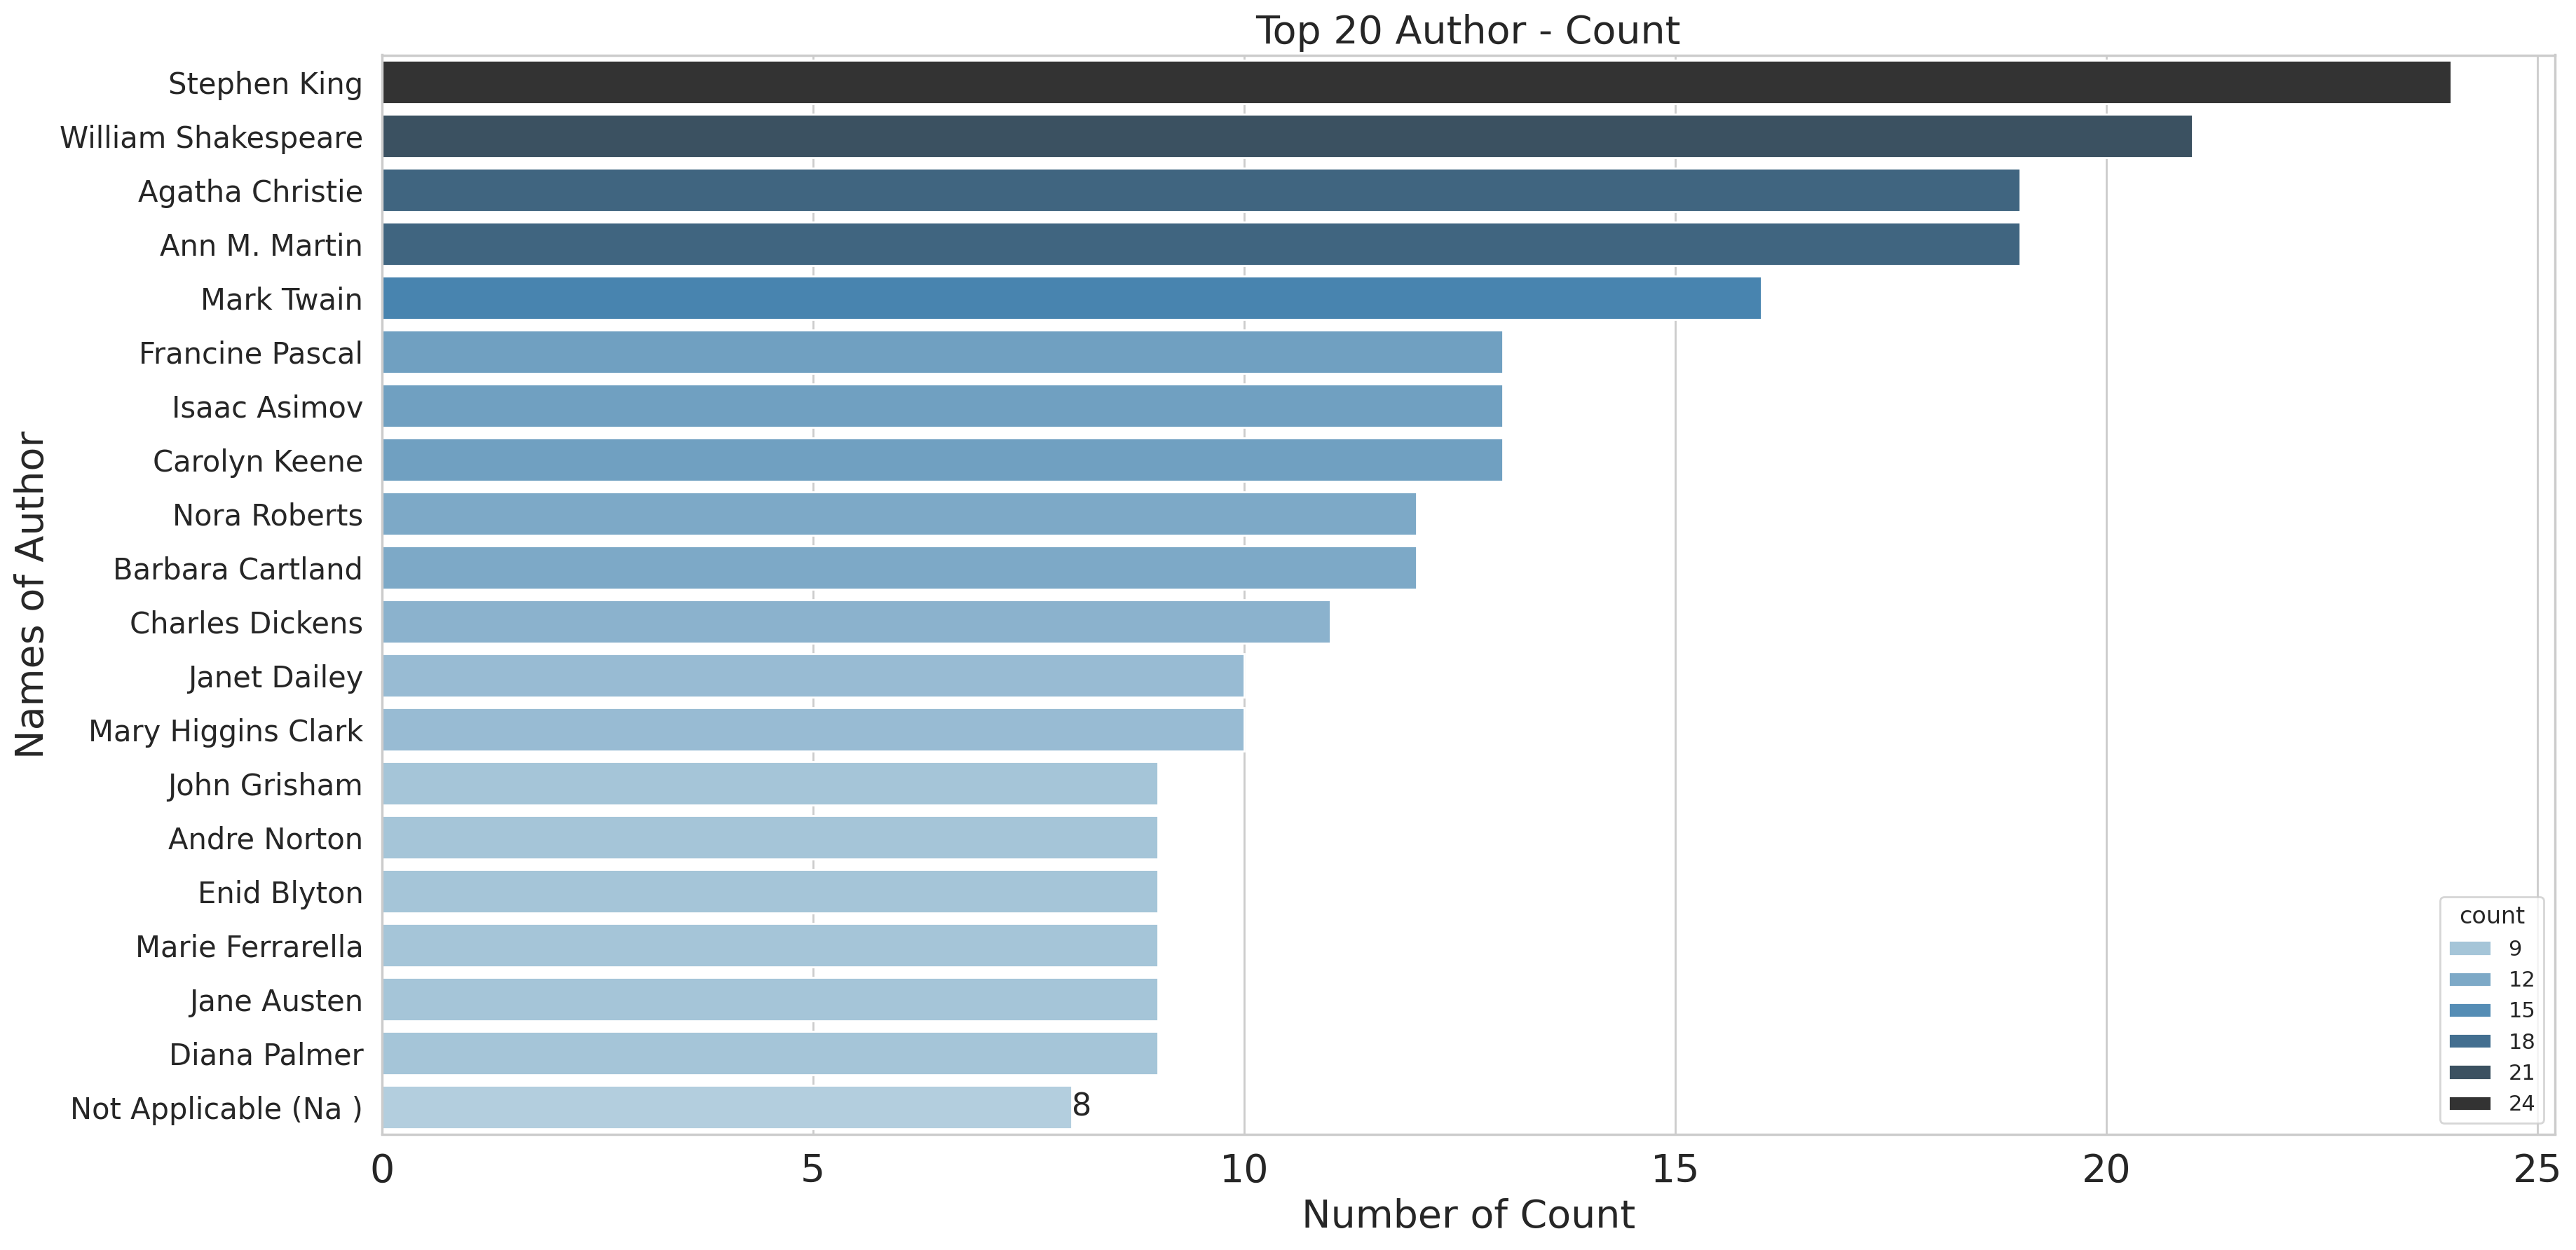

In [24]:
sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_author = subset_books['Book-Author'].value_counts()[:20]
ax = sns.barplot(x= Top_20_author, y= Top_20_author.index, palette="Blues_d", hue=Top_20_author)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Author", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Author - Count", fontsize= 20)

In [25]:
subset_books.loc[subset_books['Book-Author'] == 'Agatha Christie']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
5595,0312975120,The Unexpected Guest: A Mystery,Agatha Christie,2000,St. Martin's Press,http://images.amazon.com/images/P/0312975120.0...,http://images.amazon.com/images/P/0312975120.0...,http://images.amazon.com/images/P/0312975120.0...
7225,0425098451,N or M?,Agatha Christie,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425098451.0...,http://images.amazon.com/images/P/0425098451.0...,http://images.amazon.com/images/P/0425098451.0...
22898,0312981651,Parker Pyne Investigates,Agatha Christie,2002,St. Martin's Minotaur,http://images.amazon.com/images/P/0312981651.0...,http://images.amazon.com/images/P/0312981651.0...,http://images.amazon.com/images/P/0312981651.0...
22899,042506803X,Taken at the Flood (Hercule Poirot Mysteries (...,Agatha Christie,2004,Berkley Publishing Group,http://images.amazon.com/images/P/042506803X.0...,http://images.amazon.com/images/P/042506803X.0...,http://images.amazon.com/images/P/042506803X.0...
34999,0671470493,TOWARDS ZERO,Agatha Christie,1982,Pocket,http://images.amazon.com/images/P/0671470493.0...,http://images.amazon.com/images/P/0671470493.0...,http://images.amazon.com/images/P/0671470493.0...
76636,0061003808,Sleeping Murder,Agatha Christie,1992,Harper Mass Market Paperbacks (Mm),http://images.amazon.com/images/P/0061003808.0...,http://images.amazon.com/images/P/0061003808.0...,http://images.amazon.com/images/P/0061003808.0...
86103,0425103536,The Mysterious Mr. Quin (Hercule Poirot Myster...,Agatha Christie,1994,Berkley Publishing Group,http://images.amazon.com/images/P/0425103536.0...,http://images.amazon.com/images/P/0425103536.0...,http://images.amazon.com/images/P/0425103536.0...
100876,2702423248,A.B.C. contre Poirot,Agatha Christie,1993,Librairie des Champs-ElysÃ?Â©es,http://images.amazon.com/images/P/2702423248.0...,http://images.amazon.com/images/P/2702423248.0...,http://images.amazon.com/images/P/2702423248.0...
116413,0671432826,COME TELL HOW LIVE,Agatha Christie,1981,Pocket,http://images.amazon.com/images/P/0671432826.0...,http://images.amazon.com/images/P/0671432826.0...,http://images.amazon.com/images/P/0671432826.0...
130773,051737997X,Agatha Christie's Detectives: Five Complete No...,Agatha Christie,1983,Random House Value Publishing,http://images.amazon.com/images/P/051737997X.0...,http://images.amazon.com/images/P/051737997X.0...,http://images.amazon.com/images/P/051737997X.0...


**Insight** : Agatha Christie merupakan Author dengan karya terbanyak dalam dataset ini.

#### Top 20 Publisher

In [26]:
Unique_publisher = pd.unique(subset_books['Publisher'].values.ravel())
print("Number of Unique values: ",subset_books['Publisher'].nunique())
Value_Unique_publisher = subset_books['Publisher'].value_counts()
Value_Unique_publisher.head(50)

Number of Unique values:  2529


Publisher
Harlequin                             268
Silhouette                            185
Ballantine Books                      171
Bantam Books                          130
Pocket                                122
Penguin Books                         119
Scholastic                            110
Warner Books                          106
Simon & Schuster                      102
Penguin USA                            99
Harpercollins                          93
Berkley Publishing Group               92
Random House Inc                       88
Signet Book                            85
Fawcett Books                          83
Bantam                                 82
St Martins Pr                          73
St. Martin's Press                     65
Avon                                   63
Ace Books                              61
Zebra Books                            60
HarperCollins Publishers               60
Jove Books                             58
Tor Books               

**Insight** : Dari 10.000 data, ada sebanyak 2.572 data unik dari publisher.

Text(0.5, 1.0, 'Top 20 Publisher - Count')

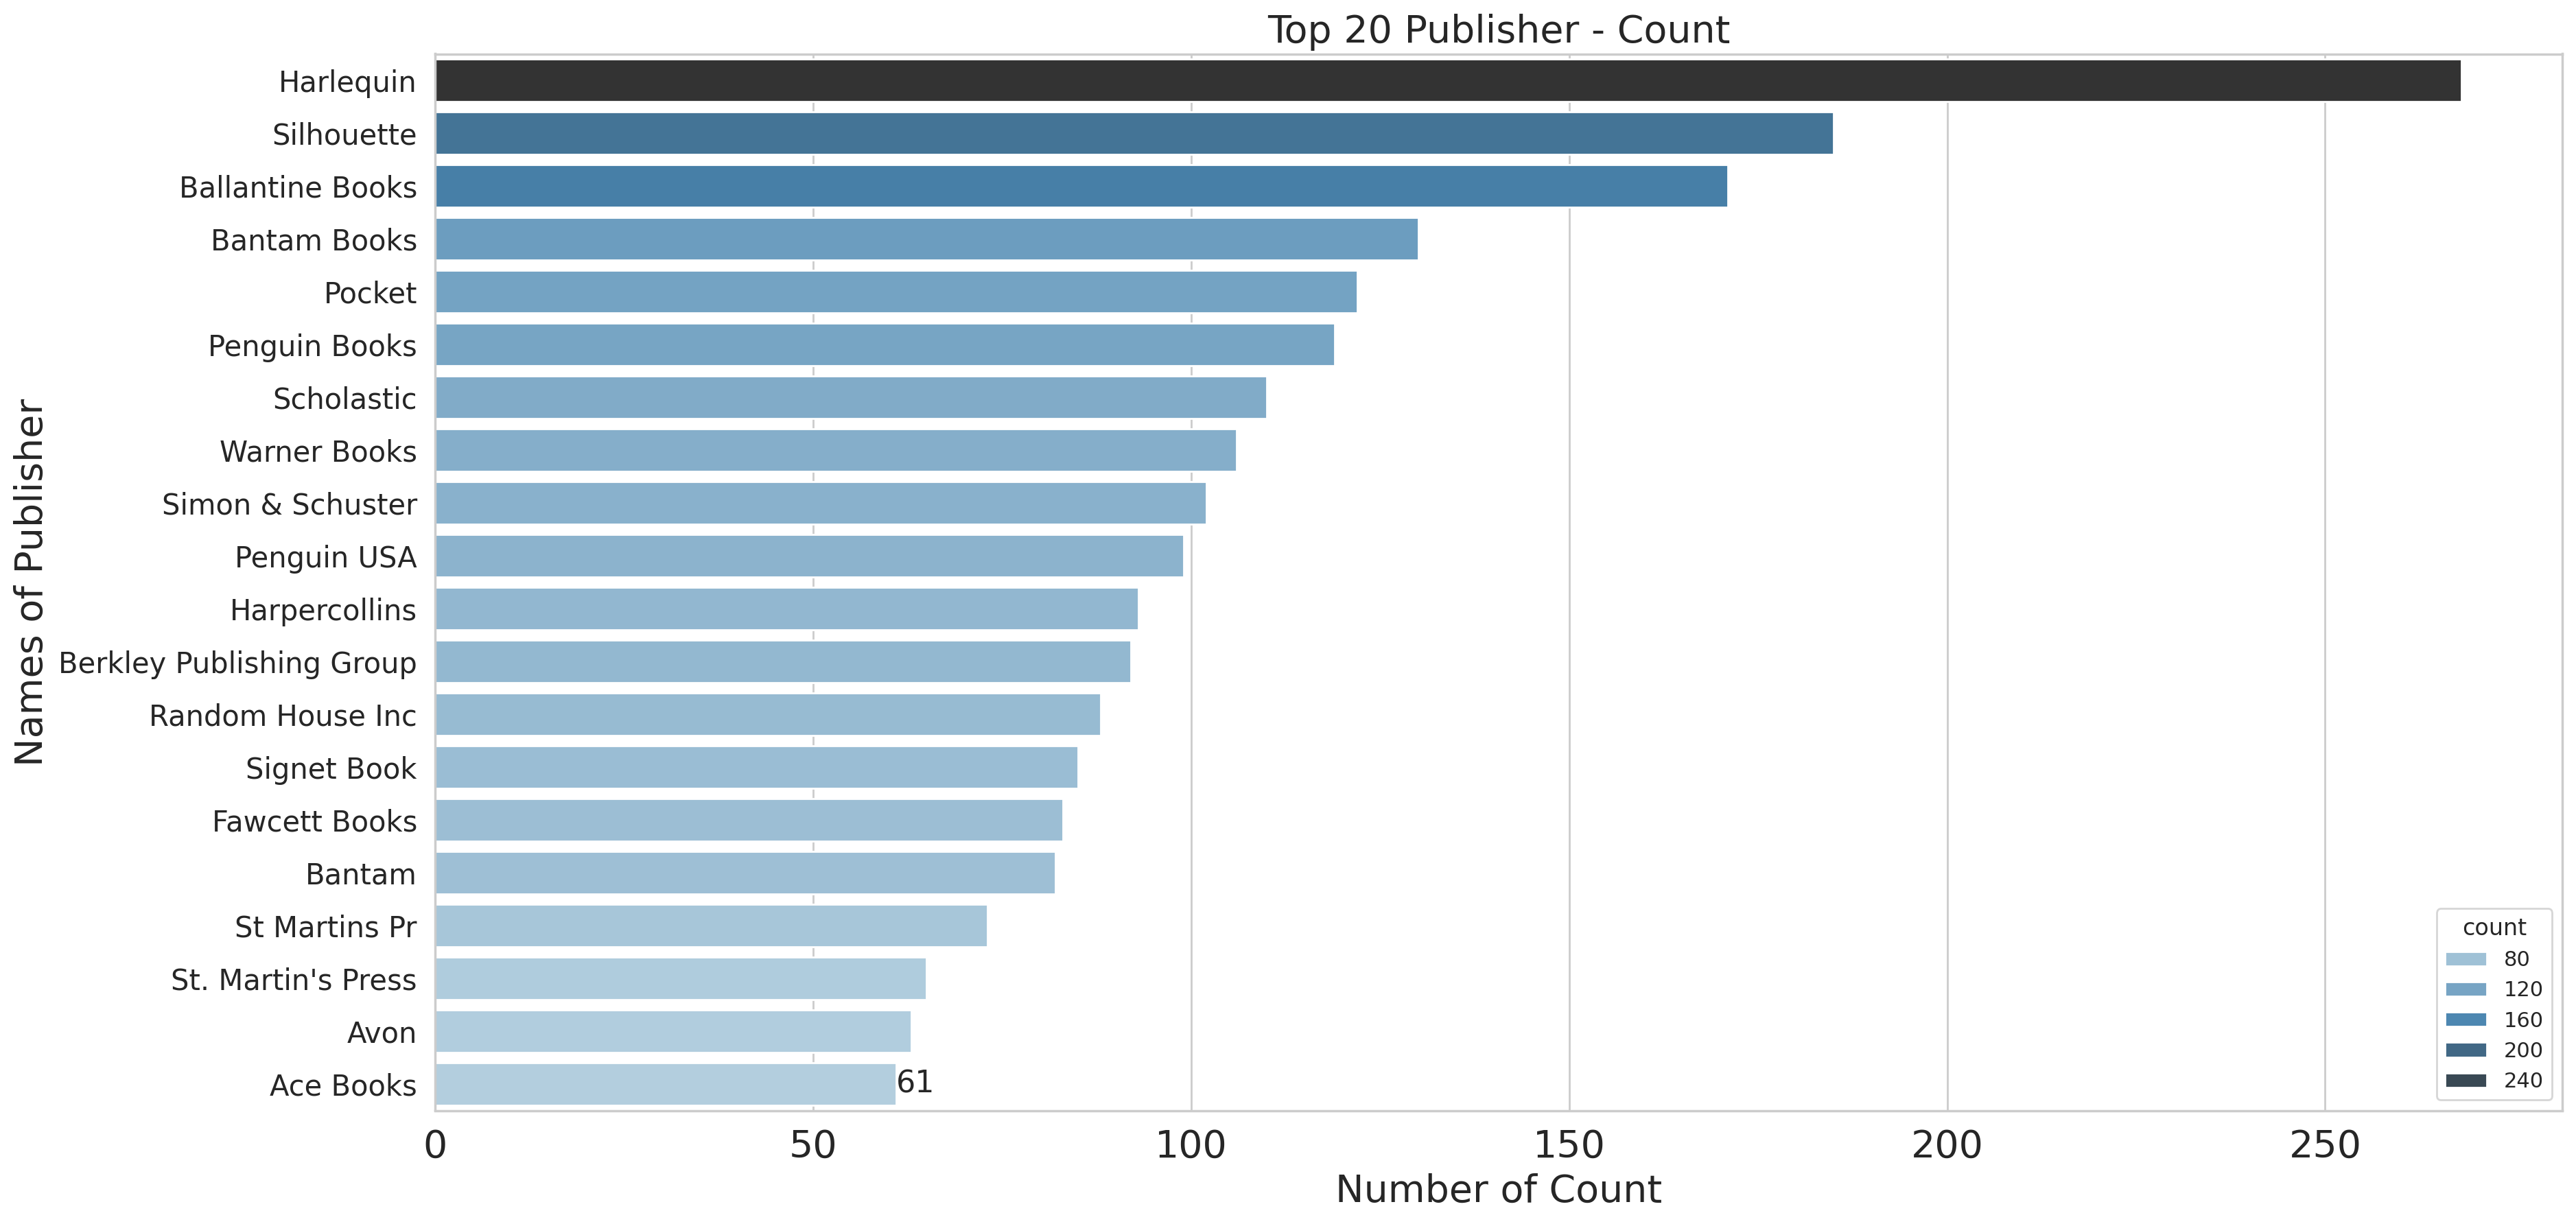

In [27]:
sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Top_20_publisher = subset_books['Publisher'].value_counts()[:20]
ax = sns.barplot(x= Top_20_publisher, y= Top_20_publisher.index, palette="Blues_d", hue=Top_20_publisher)
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.ylabel("Names of Publisher", fontsize=20)
plt.xlabel("Number of Count", fontsize=20)
plt.title("Top 20 Publisher - Count", fontsize= 20)

In [28]:
subset_books.loc[subset_books['Publisher'] == 'Harlequin']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2163,0373706545,Done Driftin' (The Dunleavy Legacy) (Harlequin...,Janis Flores,1995,Harlequin,http://images.amazon.com/images/P/0373706545.0...,http://images.amazon.com/images/P/0373706545.0...,http://images.amazon.com/images/P/0373706545.0...
5172,0373255500,"One More Time (Harlequin Temptation, No 450)",Rita Clay Estrada,1993,Harlequin,http://images.amazon.com/images/P/0373255500.0...,http://images.amazon.com/images/P/0373255500.0...,http://images.amazon.com/images/P/0373255500.0...
7174,0373710267,Charlotte Moore (Girlfriends) (Harlequin Super...,Judith Bowen,2001,Harlequin,http://images.amazon.com/images/P/0373710267.0...,http://images.amazon.com/images/P/0373710267.0...,http://images.amazon.com/images/P/0373710267.0...
7195,0373710216,We Saw Mommy Kissing Santa Claus (Harlequin Su...,Brenda Novak,2001,Harlequin,http://images.amazon.com/images/P/0373710216.0...,http://images.amazon.com/images/P/0373710216.0...,http://images.amazon.com/images/P/0373710216.0...
7954,0373691580,Are You Lonesome Tonight? (Harlequin Temptatio...,Wendy Etherington,2004,Harlequin,http://images.amazon.com/images/P/0373691580.0...,http://images.amazon.com/images/P/0373691580.0...,http://images.amazon.com/images/P/0373691580.0...
...,...,...,...,...,...,...,...,...
268401,0373034083,Moving In With Adam (Holding Out For A Hero) ...,Jeanne Allan,1996,Harlequin,http://images.amazon.com/images/P/0373034083.0...,http://images.amazon.com/images/P/0373034083.0...,http://images.amazon.com/images/P/0373034083.0...
269429,0373311222,"Spanish Coin (Regency Romance, 122)",Margaret Westhaven,1990,Harlequin,http://images.amazon.com/images/P/0373311222.0...,http://images.amazon.com/images/P/0373311222.0...,http://images.amazon.com/images/P/0373311222.0...
269543,0373034644,"Ninety - Day Wife (Harlequin Romance , Vol 3464)",Emma Goldrick,1997,Harlequin,http://images.amazon.com/images/P/0373034644.0...,http://images.amazon.com/images/P/0373034644.0...,http://images.amazon.com/images/P/0373034644.0...
269684,0373037899,"A Spanish Honeymoon (Harlequin Romance, 3789)",Anne Weale,2004,Harlequin,http://images.amazon.com/images/P/0373037899.0...,http://images.amazon.com/images/P/0373037899.0...,http://images.amazon.com/images/P/0373037899.0...


**Insight** : Harlequin merupakan penerbit dengan terbitan terbanyak, yaitu sebanyak 295 data.

#### Top 20 User

In [29]:
top_users = subset_ratings['User-ID'].value_counts()

top_users

User-ID
269566    75
265313    53
236283    51
127200    45
158295    43
          ..
268392     1
268203     1
3089       1
2591       1
1596       1
Name: count, Length: 571, dtype: int64

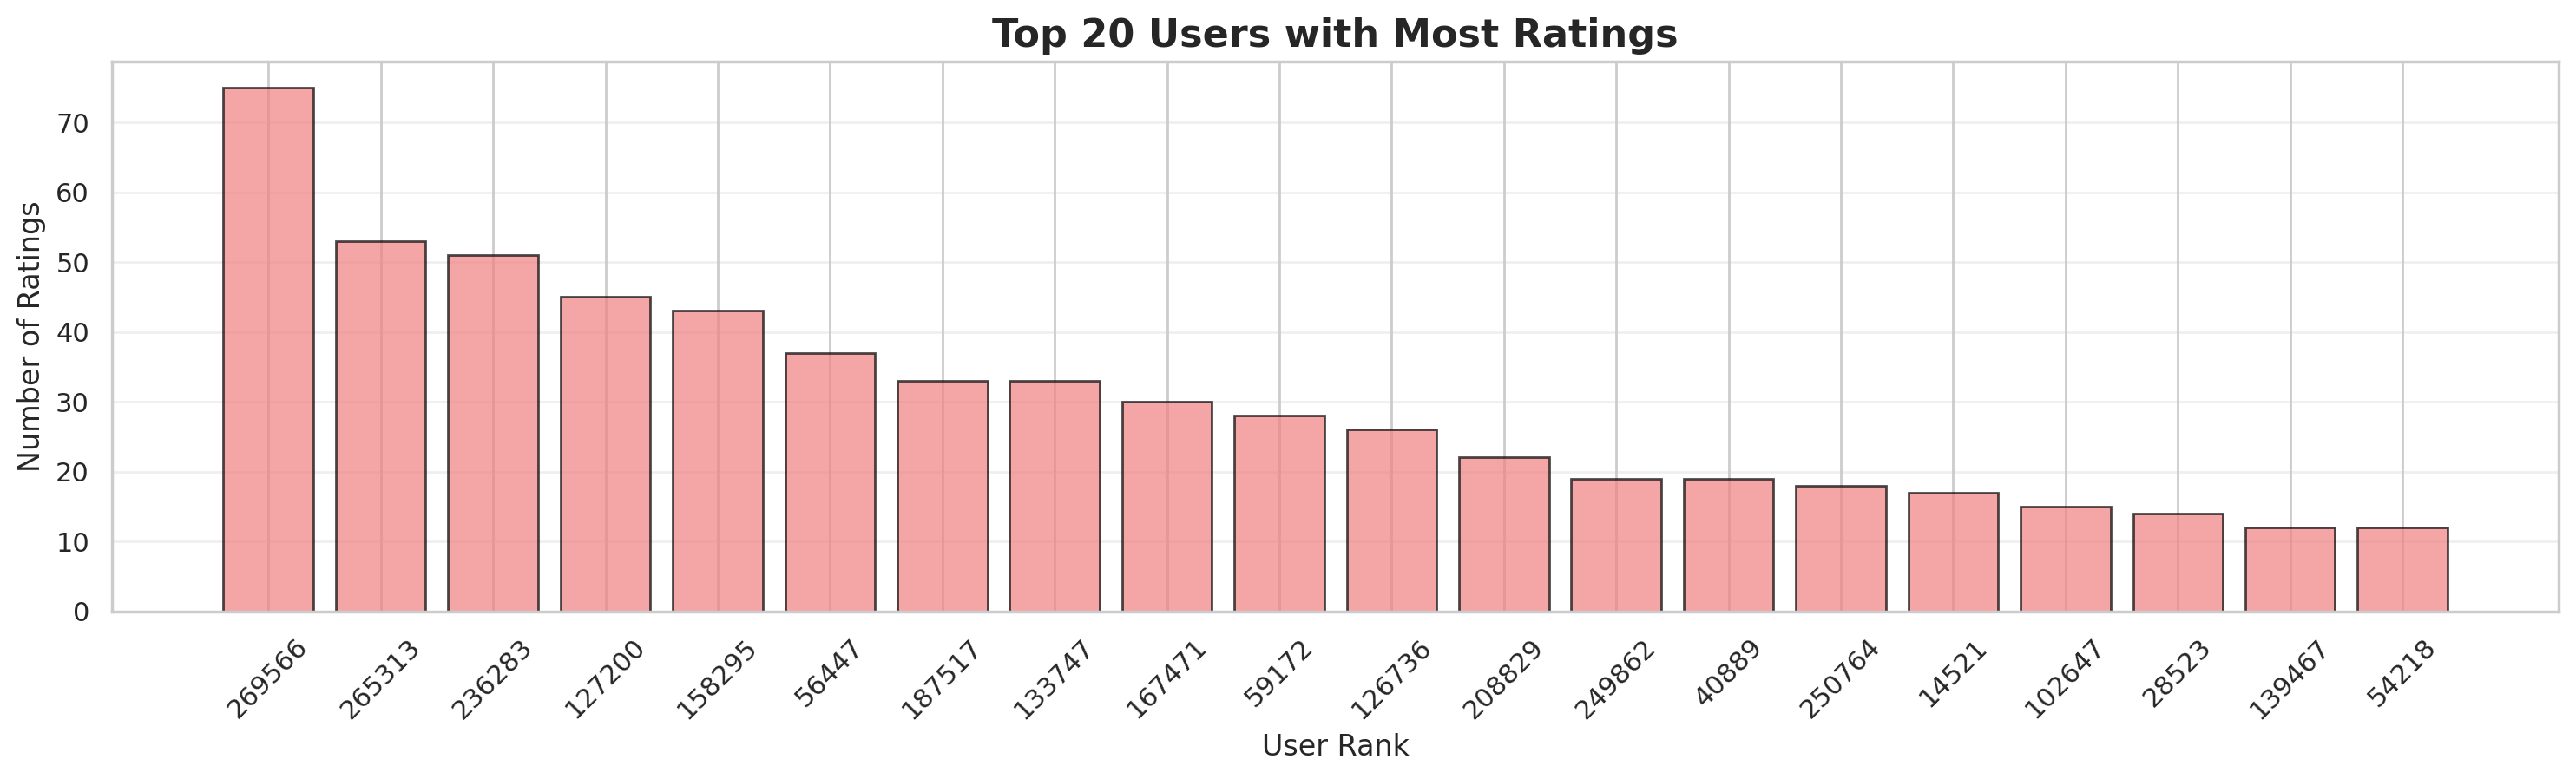

In [30]:
top_users = subset_ratings['User-ID'].value_counts().head(20)

plt.figure(figsize=(15, 8), dpi=200)
plt.subplot(2, 1, 1)

bars = plt.bar(top_users.index.astype(str), top_users.values, color='lightcoral', alpha=0.7, edgecolor='black')

plt.title('Top 20 Users with Most Ratings', fontsize=16, fontweight='bold')
plt.xlabel('User Rank', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(range(len(top_users)), top_users.index, rotation=45)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

**Insight** : User yang paling banyak memberikan rating pada dataset adalah User 245963 dengan 97 rating.

#### Rating distribution

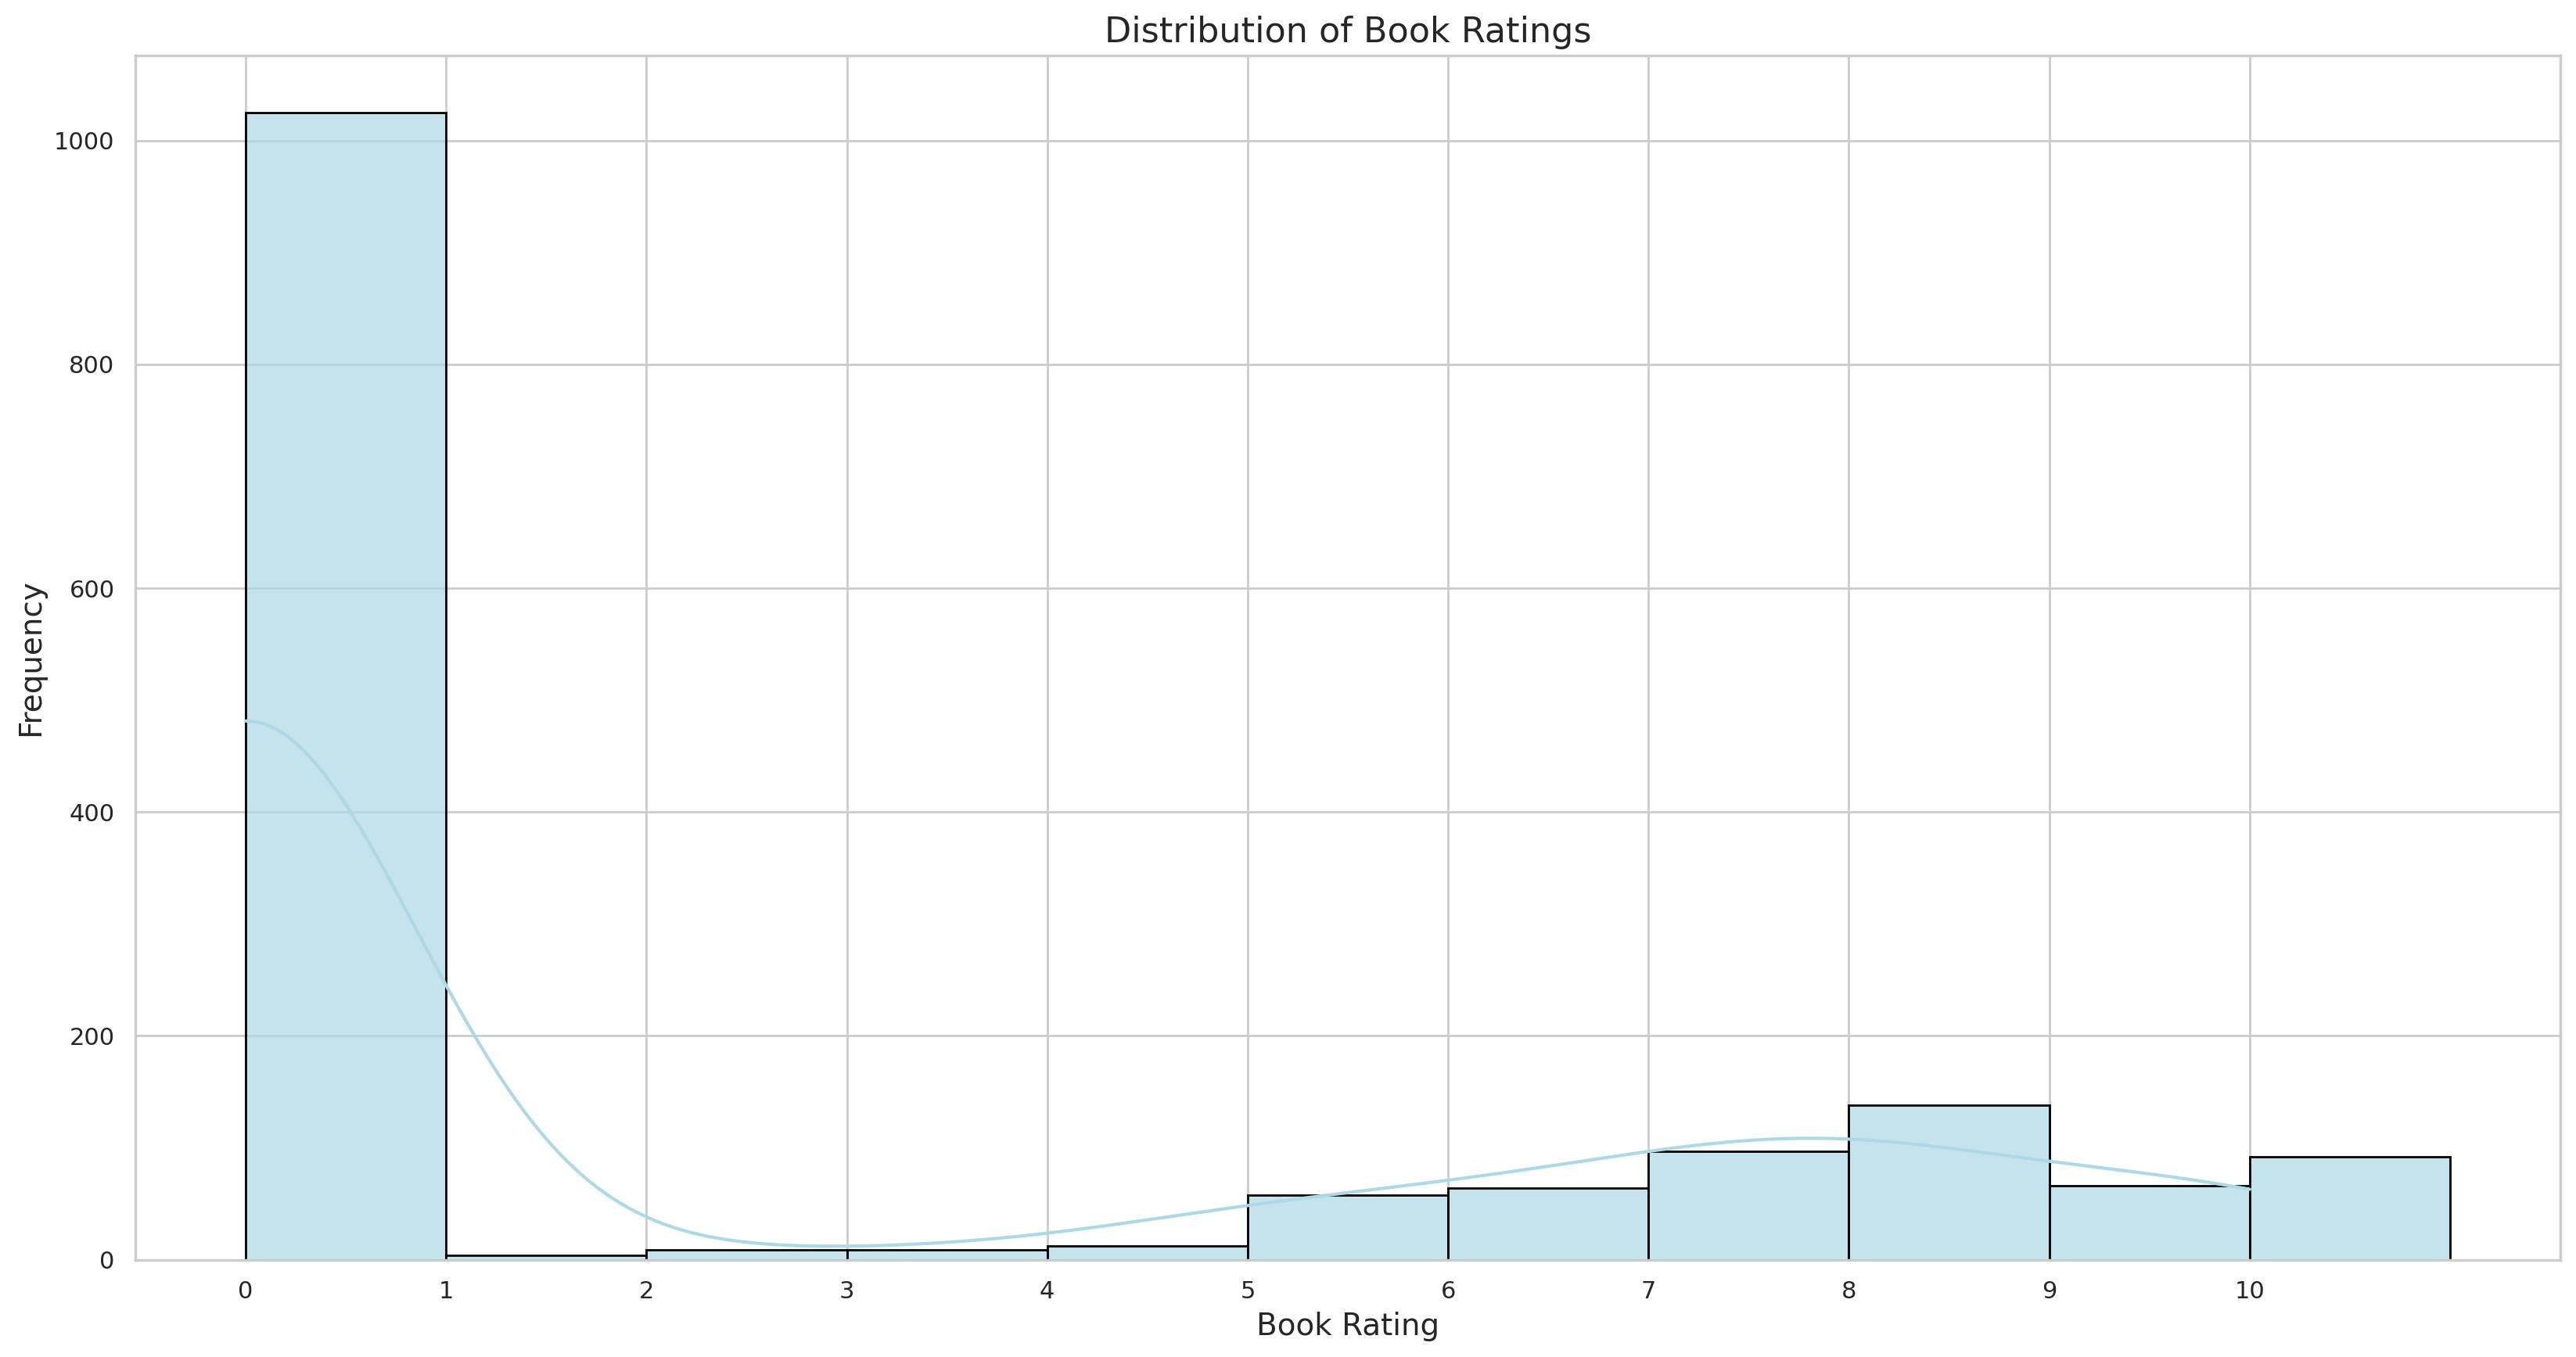

In [31]:
# Pilihan 1: Histplot (paling mirip dengan gambar asli)
plt.figure(figsize=(20,10), dpi=200)
sns.histplot(data=subset_ratings, x='Book-Rating', bins=range(0, 12), kde=True, 
             color='lightblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Book Ratings', fontsize=16)
plt.xlabel('Book Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(range(0, 11))
plt.show()

In [32]:
subset_ratings[subset_ratings['Book-Rating'] == 0]

,User-ID,ISBN,Book-Rating
3158,277945,0515118249,0
4193,278314,0688180191,0
12271,1129,0618045996,0
13077,1546,0743457358,0
13156,1596,0553582143,0
...,...,...,...
1135490,273071,0451163524,0
1137057,273707,0451163524,0
1137062,273707,1573225770,0
1144455,275210,0393324354,0


**Insight** : Ada banyak sekali rating yang memiliki nilai 0. Bahkan, rating pada dataset ini didominasi dengan rating 0.

## Data Preprocessing

### Menggabungkan Buku

In [33]:
all_books = np.concatenate((
    subset_books['ISBN'].unique(),
    subset_ratings['ISBN'].unique(),
))

all_books = np.sort(np.unique(all_books))
print('Jumlah seluruh buku pada dasaset berdasarkan ISBN:', len(all_books))

Jumlah seluruh buku pada dasaset berdasarkan ISBN: 10000


**Insight** : Jumlah seluruh buku berdasarkan ISBN ada sebanyak 10.000 data.

**Proses** : Melakukan penggabungan data isbn pada dataframe subset_books dan subset_ratings.

**Alasan perlu dilakukan** : Untuk memastikan data ISBN yang terdapat pada subset_rating dimiliki informasinya pada dataset kita.

### Menggabungkan Seluruh Users

In [34]:
all_users = np.concatenate((
    subset_users['User-ID'].unique(),
    subset_ratings['User-ID'].unique(),
))

all_users = np.sort(np.unique(all_users))
print('Jumlah seluruh user pada dasaset berdasarkan User-ID:', len(all_users))

Jumlah seluruh user pada dasaset berdasarkan User-ID: 10000


**Insight** : Terdapat 10.000 data user pada dataset.

**Proses** : Melakkan penggabungan data User-ID pada dataframe subset_users dan subset_ratings.

**Alasan perlu dilakukan** : Untuk memastikan kita memiliki informasi User-ID yang melakukan rating.

### Menggabungkan dataframe subset_books dan subset_ratings

In [35]:
book_info = pd.merge(subset_ratings, subset_books, on='ISBN', how='inner')

book_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277945,0515118249,0,The Cat Who Blew the Whistle,Lilian Jackson Braun,1996,Jove Books,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...
1,277945,051512317X,7,Rising Tides,Nora Roberts,2001,Jove Books,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...
2,278314,0688180191,0,Whale Talk,Chris Crutcher,2001,Greenwillow,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...
3,278621,1550390961,8,"Gilean Douglas: Writing Nature, Finding Home",Andrea Pinto Lebowitz,1999,Sono Nis Press,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...
4,232,0671504282,6,LAW OF THE JUNGLE (HARDY BOYS CASE FILE 105) :...,Franklin W. Dixon,1995,Simon Pulse,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...
...,...,...,...,...,...,...,...,...,...,...
1569,275154,0609802429,8,Moosewood Restaurant Daily Special: More Than ...,The Moosewood Collective,1999,Clarkson N Potter Publishers,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...
1570,275210,0393324354,0,Fanny: Being the True History of the Adventure...,Erica Jong,2003,W.W. Norton & Company,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...
1571,275210,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1572,275210,2290323551,5,Tant que dure le jour : Amour et hÃ?Â©roÃ?Â¯sm...,Susan Travers,2003,J'ai lu,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...


In [36]:
book_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              1574 non-null   int64 
 1   ISBN                 1574 non-null   object
 2   Book-Rating          1574 non-null   int64 
 3   Book-Title           1574 non-null   object
 4   Book-Author          1574 non-null   object
 5   Year-Of-Publication  1574 non-null   int64 
 6   Publisher            1574 non-null   object
 7   Image-URL-S          1574 non-null   object
 8   Image-URL-M          1574 non-null   object
 9   Image-URL-L          1574 non-null   object
dtypes: int64(3), object(7)
memory usage: 123.1+ KB


**Insight** : Dataframe book_info terdiri dari 3 data numerik dan 7 data kategorikal yang berisi data rating dan identitas buku.

**Proses** : Melakukan merge dataframe subset_books dan subset_ratings berdasarkan ISBN dengan metode inner untuk memastikan tidak ada data kosong.

**Alasan perlu dilakukan** : Untuk mempermudah pencarian informasi mengenai buku hasil rekomendasi nantinya.

### Membuat Fitur Content 
#### Membersihkan noise pada fitur Book-Title, Book-Author, dan Publisher

In [37]:
content_column = ['Book-Title', 'Book-Author', 'Publisher']

for col in content_column:
    book_info[col] = book_info[col].str.strip()
    book_info[col] = book_info[col].str.replace("[^a-zA-Z0-9]"," ",regex=True)

book_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277945,0515118249,0,The Cat Who Blew the Whistle,Lilian Jackson Braun,1996,Jove Books,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...
1,277945,051512317X,7,Rising Tides,Nora Roberts,2001,Jove Books,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...
2,278314,0688180191,0,Whale Talk,Chris Crutcher,2001,Greenwillow,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...
3,278621,1550390961,8,Gilean Douglas Writing Nature Finding Home,Andrea Pinto Lebowitz,1999,Sono Nis Press,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...
4,232,0671504282,6,LAW OF THE JUNGLE HARDY BOYS CASE FILE 105 ...,Franklin W Dixon,1995,Simon Pulse,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...
...,...,...,...,...,...,...,...,...,...,...
1569,275154,0609802429,8,Moosewood Restaurant Daily Special More Than ...,The Moosewood Collective,1999,Clarkson N Potter Publishers,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...
1570,275210,0393324354,0,Fanny Being the True History of the Adventure...,Erica Jong,2003,W W Norton Company,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...
1571,275210,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1572,275210,2290323551,5,Tant que dure le jour Amour et h ro sm...,Susan Travers,2003,J ai lu,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...


**Insight** : Pada 3 fitur yang telah dibersihkan, hanya terdapat angka dan huruf saja

**Proses** : Membersihkan spasi yang tidak perlu dan hanya memilih alfabet dan numerik menggunakan regex

**Alasan perlu dilakukan** : Untuk memastikan model fokus pada informasi yang disajikan, tidak terganggu dengan noise seperti simbol atau spasi yang tidak penting

#### Menambahkan kolom content

In [38]:
book_info['content'] = book_info['Book-Title'] + ' ' + book_info['Book-Author'] + ' ' + book_info['Publisher']

book_info

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,content
0,277945,0515118249,0,The Cat Who Blew the Whistle,Lilian Jackson Braun,1996,Jove Books,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...,The Cat Who Blew the Whistle Lilian Jackson Br...
1,277945,051512317X,7,Rising Tides,Nora Roberts,2001,Jove Books,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...,Rising Tides Nora Roberts Jove Books
2,278314,0688180191,0,Whale Talk,Chris Crutcher,2001,Greenwillow,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...,Whale Talk Chris Crutcher Greenwillow
3,278621,1550390961,8,Gilean Douglas Writing Nature Finding Home,Andrea Pinto Lebowitz,1999,Sono Nis Press,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...,Gilean Douglas Writing Nature Finding Home A...
4,232,0671504282,6,LAW OF THE JUNGLE HARDY BOYS CASE FILE 105 ...,Franklin W Dixon,1995,Simon Pulse,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...,LAW OF THE JUNGLE HARDY BOYS CASE FILE 105 ...
...,...,...,...,...,...,...,...,...,...,...,...
1569,275154,0609802429,8,Moosewood Restaurant Daily Special More Than ...,The Moosewood Collective,1999,Clarkson N Potter Publishers,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...,Moosewood Restaurant Daily Special More Than ...
1570,275210,0393324354,0,Fanny Being the True History of the Adventure...,Erica Jong,2003,W W Norton Company,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...,Fanny Being the True History of the Adventure...
1571,275210,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,Wild Animus Rich Shapero Too Far
1572,275210,2290323551,5,Tant que dure le jour Amour et h ro sm...,Susan Travers,2003,J ai lu,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...,Tant que dure le jour Amour et h ro sm...


**Insight** : Fitur konten berisi informasi buku yang meliputi judul, penulis, dan penerbit

**Proses** : Membuat kolom content yang berisi 3 fitur yang dipisahkan dengan spasi

**Alasan perlu dilakukan** : Untuk dapat melakukan rekomendasi, kita memerlukan fitur yang dapat menggambarkan karakteristik suatu data untuk menggambarkan hal yang disukai suatu user

### Mengatasi Missing Value

In [39]:
book_info.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
content                0
dtype: int64

**Insight** : Tidak ada data kosong

**Proses** : Memanggil fungsi isnull() dan menjumlahkannya dengan fungsi sum()

**Alasan perlu dilakukan** : Memastikan dataframe yang baru dibuat tidak memiliki data yang kosong

### Mengurutkan dataframe berdasrkan ISBN

In [40]:
preparation = book_info
preparation.sort_values('ISBN')

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,content
819,154345,0006550061,4,Splitting,Fay Weldon,0,Flamingo,http://images.amazon.com/images/P/0006550061.0...,http://images.amazon.com/images/P/0006550061.0...,http://images.amazon.com/images/P/0006550061.0...,Splitting Fay Weldon Flamingo
1044,191014,0020195508,10,ESSENTIAL C S LEWIS,C S Lewis,1988,Scribner Paper Fiction,http://images.amazon.com/images/P/0020195508.0...,http://images.amazon.com/images/P/0020195508.0...,http://images.amazon.com/images/P/0020195508.0...,ESSENTIAL C S LEWIS C S Lewis Scribner Paper...
627,127200,0020296304,0,WEAVER ON STRATEGY,Earl Weaver,1984,Scribner Paper Fiction,http://images.amazon.com/images/P/0020296304.0...,http://images.amazon.com/images/P/0020296304.0...,http://images.amazon.com/images/P/0020296304.0...,WEAVER ON STRATEGY Earl Weaver Scribner Paper ...
836,158295,002089130X,7,On Death Dying,Kubler Elisabeth Ross,1970,Simon Schuster,http://images.amazon.com/images/P/002089130X.0...,http://images.amazon.com/images/P/002089130X.0...,http://images.amazon.com/images/P/002089130X.0...,On Death Dying Kubler Elisabeth Ross Simon ...
1293,243328,002089130X,0,On Death Dying,Kubler Elisabeth Ross,1970,Simon Schuster,http://images.amazon.com/images/P/002089130X.0...,http://images.amazon.com/images/P/002089130X.0...,http://images.amazon.com/images/P/002089130X.0...,On Death Dying Kubler Elisabeth Ross Simon ...
...,...,...,...,...,...,...,...,...,...,...,...
486,94074,9029561505,0,De houdgreep Roman Grote ABC,Joost Zwagerman,1986,Arbeiderspers,http://images.amazon.com/images/P/9029561505.0...,http://images.amazon.com/images/P/9029561505.0...,http://images.amazon.com/images/P/9029561505.0...,De houdgreep Roman Grote ABC Joost Zwagerma...
1081,199092,904500741X,0,De kinderen van Arthur,Kristien Hemmerechts,2000,Atlas,http://images.amazon.com/images/P/904500741X.0...,http://images.amazon.com/images/P/904500741X.0...,http://images.amazon.com/images/P/904500741X.0...,De kinderen van Arthur Kristien Hemmerechts Atlas
1178,224733,9500718200,0,La Borra de Cafe,Mario Benedetti,2000,Sudamericana,http://images.amazon.com/images/P/9500718200.0...,http://images.amazon.com/images/P/9500718200.0...,http://images.amazon.com/images/P/9500718200.0...,La Borra de Cafe Mario Benedetti Sudamericana
730,134556,9505114354,0,El Evangelio Segun Jesucristo,Jose Saramago,1998,Aguilar,http://images.amazon.com/images/P/9505114354.0...,http://images.amazon.com/images/P/9505114354.0...,http://images.amazon.com/images/P/9505114354.0...,El Evangelio Segun Jesucristo Jose Saramago Ag...


**Insight** : ISBN yang ada pada dataframe berhasil diurutkan

**Proses** : memanggil fungsi sort_values()

**Alasan perlu dilakukan** : nantinya ISBN akan diencode sehingga proses ini akan merapikan data buku

### Menghapus duplikasi ISBN

In [41]:
preparation = preparation.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,content
0,277945,0515118249,0,The Cat Who Blew the Whistle,Lilian Jackson Braun,1996,Jove Books,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...,http://images.amazon.com/images/P/0515118249.0...,The Cat Who Blew the Whistle Lilian Jackson Br...
1,277945,051512317X,7,Rising Tides,Nora Roberts,2001,Jove Books,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...,http://images.amazon.com/images/P/051512317X.0...,Rising Tides Nora Roberts Jove Books
2,278314,0688180191,0,Whale Talk,Chris Crutcher,2001,Greenwillow,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...,http://images.amazon.com/images/P/0688180191.0...,Whale Talk Chris Crutcher Greenwillow
3,278621,1550390961,8,Gilean Douglas Writing Nature Finding Home,Andrea Pinto Lebowitz,1999,Sono Nis Press,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...,http://images.amazon.com/images/P/1550390961.0...,Gilean Douglas Writing Nature Finding Home A...
4,232,0671504282,6,LAW OF THE JUNGLE HARDY BOYS CASE FILE 105 ...,Franklin W Dixon,1995,Simon Pulse,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...,http://images.amazon.com/images/P/0671504282.0...,LAW OF THE JUNGLE HARDY BOYS CASE FILE 105 ...
...,...,...,...,...,...,...,...,...,...,...,...
1567,274075,3293201911,7,Die Ungeduldigen,Assia Djebar,2000,Unionsverlag,http://images.amazon.com/images/P/3293201911.0...,http://images.amazon.com/images/P/3293201911.0...,http://images.amazon.com/images/P/3293201911.0...,Die Ungeduldigen Assia Djebar Unionsverlag
1569,275154,0609802429,8,Moosewood Restaurant Daily Special More Than ...,The Moosewood Collective,1999,Clarkson N Potter Publishers,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...,http://images.amazon.com/images/P/0609802429.0...,Moosewood Restaurant Daily Special More Than ...
1570,275210,0393324354,0,Fanny Being the True History of the Adventure...,Erica Jong,2003,W W Norton Company,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...,http://images.amazon.com/images/P/0393324354.0...,Fanny Being the True History of the Adventure...
1572,275210,2290323551,5,Tant que dure le jour Amour et h ro sm...,Susan Travers,2003,J ai lu,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...,http://images.amazon.com/images/P/2290323551.0...,Tant que dure le jour Amour et h ro sm...


**Insight** : Data duplikat ISBN berhasil dibersihkan

**Proses** : Memanggil fungsi drop_duplicates()

**Alasan perlu dilakukan** : ISBN merupakan International Standard Book Number yang berarti ISBN bernilai unik. Duplikasi ISBN perlu dibersihkan supaya tidak terjadi kebingungan.

### Konversi ke dalam bentuk list

In [42]:
# Mengonversi data series ISBN menjadi dalam bentuk list
isbn = preparation['ISBN'].tolist()
    
# Mengonversi data series Book-Title menjadi dalam bentuk list
book_title = preparation['Book-Title'].tolist()
    
# Mengonversi data series content menjadi dalam bentuk list
content = preparation['content'].tolist()
    
print(len(isbn))
print(len(book_title))
print(len(content))

980
980
980


**Insight** : Ketiga fitur memiliki jumlah data yang sama yaitu 1119 data

**Proses** : Memanggil fungsi tolist pada fitur ISBN, Book-Title, dan content

**Alasan perlu dilakukan** : Karena algoritma yang digunakan nantinya bekerja lebih optimal pada data berbentuk list

### Membuat variabel books_cleaned

In [43]:
books_cleaned = pd.DataFrame({
    'ISBN': isbn,
    'Book-Title': book_title,
    'content': content
})

books_cleaned

,ISBN,Book-Title,content
0,0515118249,The Cat Who Blew the Whistle,The Cat Who Blew the Whistle Lilian Jackson Br...
1,051512317X,Rising Tides,Rising Tides Nora Roberts Jove Books
2,0688180191,Whale Talk,Whale Talk Chris Crutcher Greenwillow
3,1550390961,Gilean Douglas Writing Nature Finding Home,Gilean Douglas Writing Nature Finding Home A...
4,0671504282,LAW OF THE JUNGLE HARDY BOYS CASE FILE 105 ...,LAW OF THE JUNGLE HARDY BOYS CASE FILE 105 ...
...,...,...,...
975,3293201911,Die Ungeduldigen,Die Ungeduldigen Assia Djebar Unionsverlag
976,0609802429,Moosewood Restaurant Daily Special More Than ...,Moosewood Restaurant Daily Special More Than ...
977,0393324354,Fanny Being the True History of the Adventure...,Fanny Being the True History of the Adventure...
978,2290323551,Tant que dure le jour Amour et h ro sm...,Tant que dure le jour Amour et h ro sm...


**Insight** : books_cleaned berhasil menyimpan data yang telah dipersiapkan sebelumnya

**Proses** : Membuat DataFrame dengan library pandas

**Alasan perlu dilakukan** : Menyimpan data-data penting yang telah dibersihkan

### Membuat fungsi encode dan decode

In [44]:
df = subset_ratings
df

,User-ID,ISBN,Book-Rating
3158,277945,0515118249,0
3160,277945,051512317X,7
4193,278314,0688180191,0
9193,278621,1550390961,8
9907,232,0671504282,6
...,...,...,...
1144324,275154,0609802429,8
1144455,275210,0393324354,0
1144474,275210,0971880107,0
1144477,275210,2290323551,5


In [45]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['User-ID'].unique().tolist()
print('list userID: ', user_ids)
    
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
    
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [277945, 278314, 278621, 232, 1129, 1546, 1596, 2591, 3089, 3660, 3669, 3902, 5037, 5264, 6445, 6507, 7426, 7970, 8268, 8537, 8672, 8971, 9067, 9080, 9143, 9642, 9979, 10030, 10590, 10716, 12100, 12154, 12331, 14461, 14521, 14667, 16276, 16319, 17330, 17391, 19605, 19657, 19900, 19974, 21540, 21860, 22343, 22710, 23650, 23948, 24115, 25677, 25827, 25890, 26051, 26831, 27169, 27462, 27472, 27740, 28091, 28523, 29265, 29660, 29676, 29694, 29785, 29806, 31199, 31681, 32963, 33576, 33633, 34075, 35240, 35371, 35910, 37208, 37400, 37615, 38679, 39459, 40889, 41245, 41585, 41701, 41998, 43392, 43619, 44184, 44404, 45218, 45918, 45993, 46159, 46394, 47635, 47779, 48495, 48503, 49314, 49760, 50104, 50504, 50861, 50955, 51488, 51518, 51526, 52499, 52851, 52900, 52968, 53189, 53575, 53688, 53816, 54118, 54148, 54218, 54730, 55187, 55448, 56447, 57398, 57954, 58255, 58736, 58768, 59047, 59148, 59172, 59615, 59682, 59912, 60488, 61429, 61602, 61668, 61900, 62398, 62680, 62929, 63184,

In [46]:
# Mengubah ISBN menjadi list tanpa nilai yang sama
isbn_ids = df['ISBN'].unique().tolist()
print('list ISBN: ', isbn_ids)
    
# Melakukan proses encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_ids)}
print('encoded ISBN : ', isbn_to_isbn_encoded)
    
# Melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_ids)}
print('encoded angka ke ISBN: ', isbn_encoded_to_isbn)

list ISBN:  ['0515118249', '051512317X', '0688180191', '1550390961', '0671504282', '0618045996', '0743457358', '0553582143', '0374166560', '0553289411', '0152008772', '0373079710', '0874831121', '0312975120', '0671729462', '0971880107', '2020326450', '0140070206', '0380722704', '0553345842', '0446606383', '0394733525', '0521777526', '0553274503', '0553293354', '3379001252', '3453173309', '3453217314', '351836605X', '3518372297', '3453152816', '1400042070', '8472236552', '0553210211', '0553297422', '0385419457', '0688126731', '0060927518', '0679768203', '0940322587', '0316781266', '0385420161', '1573222321', '3453036972', '014023828X', '0345337662', '0374226385', '0375703055', '0380600129', '0380778025', '0425179613', '044022165X', '0440236819', '0446344281', '0446603716', '0451148223', '0451206525', '0553260111', '0671400274', '0671534734', '067164257X', '0316782262', '051513287X', '0060927860', '284205511X', '0440441587', '0451160533', '0765305569', '1586420429', '0553578693', '842642

**Insight** : Fitur User_ID dan ISBN berhasil memiliki fungsi encode dan decode

**Proses** : Pada masing-masing fitur diambil nilai uniknya terlebih dahulu, kemudian membuat dictionary yang berisi nilai asal dan hasil encoding, begotu jug auntuk proses decode

**Alasan perlu dilakukan** : Karena model tidak dapat memproses data kategorikal sehingga perlu dilakukan encoding terlebih dahulu

### Mapping hasil encoding ke dataframe

In [47]:
# Mapping User-ID ke dataframe user
df['user'] = df['User-ID'].map(user_to_user_encoded)
    
# Mapping ISBN ke dataframe isbn
df['isbn'] = df['ISBN'].map(isbn_to_isbn_encoded)

In [48]:
df

,User-ID,ISBN,Book-Rating,user,isbn
3158,277945,0515118249,0,0,0
3160,277945,051512317X,7,0,1
4193,278314,0688180191,0,1,2
9193,278621,1550390961,8,2,3
9907,232,0671504282,6,3,4
...,...,...,...,...,...
1144324,275154,0609802429,8,568,976
1144455,275210,0393324354,0,569,977
1144474,275210,0971880107,0,569,15
1144477,275210,2290323551,5,569,978


**Insight** : Berhasil melakukan encoding fitur user dan isbn

**Proses** : Mmmanggil fungsi map()

**Alasan perlu dilakukan** : Karena model tidak dapat memproses data kategorikal sehingga perlu dilakukan encoding terlebih dahulu

### Medapatkan nilai minimun dan maksimum rating untuk normalisasi

In [49]:
min_rating = min(df['Book-Rating'])
    
max_rating = max(df['Book-Rating'])
    
print(' Min Rating: {}, Max Rating: {}'.format(
    min_rating, max_rating
))

 Min Rating: 0, Max Rating: 10


**Insight** : Rating memiliki nilai minimum 0.0 dan maksimum 10.0

**Proses** : memanggil fungsi min() dan max()

**Alasan perlu dilakukan** : Data minimum dan maksimum akan digunakan dalam proses normalisasi untuk meningkatkan kinerja model

### Mengacak data pada dataset

In [50]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

2025-05-25 02:11:16.537029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748113876.647019    7083 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748113876.677028    7083 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748113877.079300    7083 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748113877.079336    7083 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748113877.079340    7083 computation_placer.cc:177] computation placer alr

In [51]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,User-ID,ISBN,Book-Rating,user,isbn
863838,208829,051513287X,10,444,62
626599,151991,0099744414,0,335,119
915356,223129,0345403959,0,466,763
435575,104278,0553579231,10,226,377
429224,102647,0312925336,7,223,364
...,...,...,...,...,...
863965,208829,0843948043,0,444,738
1015869,243328,0425179613,10,500,50
653749,158295,0451205014,0,347,370
1106206,265313,0553576119,0,549,902


**Insight** : data pada Dataframe berhasil diacak

**Proses** : Memanggil fungsi sample()

**Alasan perlu dilakukan** : Untuk meningkatkan generalisasi, salah satunya dengan menghindari urutan bias

### Membagi Data untuk Training dan Validasi

In [52]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'isbn']].values
    
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
    
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
    
print(x, y)

[[444  62]
 [335 119]
 [466 763]
 ...
 [347 370]
 [549 902]
 [444 734]] [1. 0. 0. ... 0. 0. 0.]


**Insight** : Data berhasil dibagi menjadi data train dan validasi dengan variabel x dan y (target)

**Proses** : Pada variabel x dilakukan pengambilan values pada fitur user dan isbn, variabel y dengan fitur rating yang dilakukan proses normalisasi terlebih dahulu. setelah itu data dibagi dengan proporsi 80:20 

**Alasan perlu dilakukan** : Menentukan data training dan data validasi untuk model belajar

## Modeling dan Result

### Model Development dengan Collaborative Filtering

#### Proses Training

In [53]:
class RecommenderNet(tf.keras.Model):
     
    # Insialisasi fungsi
    def __init__(self, num_users, num_books, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size

        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(
            num_users,
            1) # layer embedding user bias
        
        self.book_embedding = layers.Embedding( # layer embeddings book
            num_books,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )

        self.book_bias = layers.Embedding(
            num_books, 
            1) # layer embedding book bias
        self.dropout = layers.Dropout(0.2) # layer dropout
        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
        book_vector = self.book_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_bias = self.book_bias(inputs[:, 1]) # memanggil layer embedding 4
     
        dot_user_book = tf.tensordot(user_vector, book_vector, 2) 
     
        x = dot_user_book + user_bias + book_bias
        
        return tf.nn.sigmoid(x) # activation sigmoid



Penyusunan model

1. Arsitektur Model
   1. Embedding Layers: User & Book embeddings (50 dimensi) + bias terms
   2. Dot Product: Menghitung similarity user-book vectors
   3. Output: Sigmoid activation untuk prediksi probabilitas (0-1)
2. Komponen Utama 
   - User/Book Embeddings: Representasi vektor laten
   - Bias Terms: Preferensi global user & popularitas item
   - Regularization: L2 (1e-6) + Dropout (0.2)
   - Loss: Binary Crossentropy
   - Optimizer: Adam (lr=0.001)

In [54]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
    
# Mendapatkan jumlah isbn
num_books = len(isbn_encoded_to_isbn)
print(num_books)

571
980


In [55]:
model = RecommenderNet(num_users, num_books, 50) # inisialisasi model
    
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2025-05-25 02:11:22.025777: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [56]:
# Memulai training
    
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6942 - root_mean_squared_error: 0.4469 - val_loss: 0.6844 - val_root_mean_squared_error: 0.4414
Epoch 2/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6408 - root_mean_squared_error: 0.4106 - val_loss: 0.6741 - val_root_mean_squared_error: 0.4355
Epoch 3/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5949 - root_mean_squared_error: 0.3815 - val_loss: 0.6647 - val_root_mean_squared_error: 0.4301
Epoch 4/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5583 - root_mean_squared_error: 0.3626 - val_loss: 0.6583 - val_root_mean_squared_error: 0.4264
Epoch 5/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5445 - root_mean_squared_error: 0.3564 - val_loss: 0.6538 - val_root_mean_squared_error: 0.4238
Epoch 6/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4977 - root_mean_squared_error: 0.3324 - val_loss: 0.6489 - val_root_mean_squared_error: 0.4210
Epoch 7/100
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

3. Training Setup
   1. Epochs: 100
   2. Batch Size: 8
   3. Validation: Train-validation split
   4. Metric: RMSE

4. Flow Prediksi
   1. Input: (user_id, book_id)
   2. Ambil embedding vectors
   3. Hitung: dot_product + user_bias + book_bias
   4. Sigmoid → probabilitas preferensi

5. Hasil
Model Neural Collaborative Filtering yang dapat memprediksi preferensi user terhadap buku berdasarkan pola interaksi historis dengan representasi embedding yang dipelajari secara end-to-end.

### Mendapatkan Rekomendasi ISBN

In [57]:
import pandas as pd
import numpy as np
import random
from IPython.display import HTML, display

def get_book_recommendations(model, user_to_user_encoded, isbn_to_isbn_encoded, 
                           subset_users, subset_ratings, book_info, user_id=None):
    """
    Generate book recommendations for a user using the trained model
    """
    
    # Random user selection if no user_id provided
    if user_id is None:
        user_id = subset_users['User-ID'].sample(1).iloc[0]
    
    print(f"🔍 Processing recommendations for User ID: {user_id}")
    
    # Check if user exists in encoding
    if user_id not in user_to_user_encoded:
        print(f"❌ User {user_id} not found in user encodings")
        return None
    
    # Get user encoder
    user_encoder = user_to_user_encoded[user_id]
    print(f"   User encoder: {user_encoder} (type: {type(user_encoder)})")
    
    # Ensure user_encoder is integer
    try:
        user_encoder = int(user_encoder)
    except (ValueError, TypeError):
        print(f"❌ Invalid user encoder: {user_encoder}")
        return None
    
    # Books rated by this user
    books_rated_by_user = subset_ratings[subset_ratings['User-ID'] == user_id]
    
    # Books NOT rated by this user
    all_books = set(subset_ratings['ISBN'].unique())
    books_rated = set(books_rated_by_user['ISBN'].values)
    books_not_rated = list(all_books - books_rated)
    
    print(f"   Books rated by user: {len(books_rated_by_user)}")
    print(f"   Books not rated: {len(books_not_rated)}")
    
    # Filter and encode books, ensuring no None values
    valid_user_book_pairs = []
    valid_books = []
    
    for book_isbn in books_not_rated:
        if book_isbn in isbn_to_isbn_encoded:
            book_encoder = isbn_to_isbn_encoded[book_isbn]
            
            # Ensure book_encoder is valid integer
            try:
                book_encoder = int(book_encoder)
                valid_user_book_pairs.append([user_encoder, book_encoder])
                valid_books.append(book_isbn)
            except (ValueError, TypeError):
                continue
    
    print(f"   Valid books for prediction: {len(valid_books)}")
    
    if len(valid_user_book_pairs) == 0:
        print("❌ No valid books available for recommendation")
        return None
    
    # Create numpy array with explicit integer dtype
    user_book_array = np.array(valid_user_book_pairs, dtype=np.int32)
    
    print(f"   Array shape: {user_book_array.shape}")
    print(f"   Array dtype: {user_book_array.dtype}")
    print(f"   Array min/max: {user_book_array.min()}/{user_book_array.max()}")
    print()
    
    # Verify array integrity
    if np.any(np.isnan(user_book_array)) or np.any(np.isinf(user_book_array)):
        print("❌ Array contains NaN or Inf values")
        return None
    
    try:
        # Get predictions from model
        predictions = model.predict(user_book_array, verbose=0).flatten()
        
        # Get top 10 recommendations
        top_indices = predictions.argsort()[-10:][::-1]
        recommended_book_scores = [(valid_books[i], predictions[i]) for i in top_indices]
        
        print("🎯 USER-BASED BOOK RECOMMENDATIONS")
        print("="*60)
        print(f"👤 User ID: {user_id}")
        print(f"📊 Books rated by user: {len(books_rated_by_user)}")
        print(f"🔮 Generated recommendations from {len(valid_books)} unrated books")
        print()
        
        # Show user's top rated books
        print("📚 USER'S TOP RATED BOOKS")
        print("-"*40)
        if len(books_rated_by_user) > 0:
            top_user_books = books_rated_by_user.sort_values('Book-Rating', ascending=False).head(3)
            
            for idx, (_, book_row) in enumerate(top_user_books.iterrows(), 1):
                book_details = book_info[book_info['ISBN'] == book_row['ISBN']]
                if len(book_details) > 0:
                    book_detail = book_details.iloc[0]
                    print(f"⭐ {book_row['Book-Rating']}/10 | {book_detail['Book-Title']}")
                    print(f"   👤 {book_detail['Book-Author']}")
                    
                    # Show image if available
                    if pd.notna(book_detail.get('Image-URL-M')):
                        display(HTML(f'<img src="{book_detail["Image-URL-M"]}" style="width:80px; height:120px; object-fit:cover; border-radius:5px; margin:5px 0;">'))
                    print()
        else:
            print("❌ No rated books found for this user")
        
        print()
        print("🤖 TOP 5 ML RECOMMENDATIONS")
        print("="*50)
        
        # Show top 5 recommendations
        for rank, (isbn, score) in enumerate(recommended_book_scores[:5], 1):
            book_details = book_info[book_info['ISBN'] == isbn]
            
            if len(book_details) > 0:
                book_detail = book_details.iloc[0]
                
                # Rank emoji
                rank_emoji = {1: "🥇", 2: "🥈", 3: "🥉", 4: "4️⃣", 5: "5️⃣"}
                
                print(f"{rank_emoji[rank]} RANK #{rank} | Predicted Rating: {score:.3f}")
                print(f"📖 {book_detail['Book-Title']}")
                print(f"✍️  {book_detail['Book-Author']}")
                print(f"🏷️  {book_detail.get('Publisher', 'Unknown Publisher')}")
                
                # Display image if available
                if pd.notna(book_detail.get('Image-URL-M')):
                    display(HTML(f'<img src="{book_detail["Image-URL-M"]}" style="width:100px; height:150px; object-fit:cover; border-radius:5px; margin:5px 0;">'))
                else:
                    print("📷 No image available")
                
                print("-" * 40)
        
       
        return recommended_book_scores
        
    except Exception as e:
        print(f"❌ Error during prediction: {str(e)}")
        print(f"   Error type: {type(e).__name__}")
        return None

def validate_encodings(user_to_user_encoded, isbn_to_isbn_encoded):
    """
    Validate that all encodings are proper integers
    """
    print("🔍 VALIDATING ENCODINGS")
    print("-"*30)
    
    # Check user encodings
    invalid_users = []
    for user_id, encoding in user_to_user_encoded.items():
        try:
            int(encoding)
        except (ValueError, TypeError):
            invalid_users.append((user_id, encoding))
    
    # Check ISBN encodings
    invalid_isbns = []
    for isbn, encoding in isbn_to_isbn_encoded.items():
        try:
            int(encoding)
        except (ValueError, TypeError):
            invalid_isbns.append((isbn, encoding))
    
    print(f"✅ Valid user encodings: {len(user_to_user_encoded) - len(invalid_users)}")
    print(f"❌ Invalid user encodings: {len(invalid_users)}")
    print(f"✅ Valid ISBN encodings: {len(isbn_to_isbn_encoded) - len(invalid_isbns)}")
    print(f"❌ Invalid ISBN encodings: {len(invalid_isbns)}")
    
    if invalid_users:
        print(f"\nInvalid user encodings (first 5): {invalid_users[:5]}")
    if invalid_isbns:
        print(f"Invalid ISBN encodings (first 5): {invalid_isbns[:5]}")
    
    return len(invalid_users) == 0 and len(invalid_isbns) == 0

def fix_encodings(df, user_col='User-ID', isbn_col='ISBN'):
    """
    Create clean integer encodings for users and ISBNs
    """
    print("🛠️  CREATING CLEAN ENCODINGS")
    print("-"*30)
    
    # Get unique values and sort them for consistent encoding
    unique_users = sorted(df[user_col].unique())
    unique_isbns = sorted(df[isbn_col].unique())
    
    # Create clean integer encodings starting from 0
    user_to_user_encoded = {user_id: idx for idx, user_id in enumerate(unique_users)}
    isbn_to_isbn_encoded = {isbn: idx for idx, isbn in enumerate(unique_isbns)}
    
    # Create reverse mappings
    user_encoded_to_user = {idx: user_id for user_id, idx in user_to_user_encoded.items()}
    isbn_encoded_to_isbn = {idx: isbn for isbn, idx in isbn_to_isbn_encoded.items()}
    
    print(f"✅ Created {len(user_to_user_encoded)} user encodings")
    print(f"✅ Created {len(isbn_to_isbn_encoded)} ISBN encodings")
    print(f"📊 User encoding range: 0 to {len(user_to_user_encoded)-1}")
    print(f"📊 ISBN encoding range: 0 to {len(isbn_to_isbn_encoded)-1}")
    
    return user_to_user_encoded, isbn_to_isbn_encoded, user_encoded_to_user, isbn_encoded_to_isbn


In [58]:
recommendations = get_book_recommendations(
    model=model,
    user_to_user_encoded=user_to_user_encoded,
    isbn_to_isbn_encoded=isbn_to_isbn_encoded,
    subset_users=df,
    subset_ratings=df,
    book_info=book_info
)

🔍 Processing recommendations for User ID: 158516
   User encoder: 349 (type: <class 'int'>)
   Books rated by user: 2
   Books not rated: 978
   Valid books for prediction: 978
   Array shape: (978, 2)
   Array dtype: int32
   Array min/max: 0/979

🎯 USER-BASED BOOK RECOMMENDATIONS
👤 User ID: 158516
📊 Books rated by user: 2
🔮 Generated recommendations from 978 unrated books

📚 USER'S TOP RATED BOOKS
----------------------------------------
⭐ 6/10 | Katwalk  Kat Colorado Mysteries 
   👤 Karen Kijewski



⭐ 5/10 | Where Are the Children 
   👤 Mary Higgins Clark




🤖 TOP 5 ML RECOMMENDATIONS
🥇 RANK #1 | Predicted Rating: 0.883
📖 The Best Laid Plans
✍️  Sidney Sheldon
🏷️  Warner Books


----------------------------------------
🥈 RANK #2 | Predicted Rating: 0.876
📖 Harry Potter and the Order of the Phoenix  Book 5 
✍️  J  K  Rowling
🏷️  Scholastic


----------------------------------------
🥉 RANK #3 | Predicted Rating: 0.876
📖 The Little Prince
✍️  Antoine de Saint Exup  ry
🏷️  Harcourt Children s Books


----------------------------------------
4️⃣ RANK #4 | Predicted Rating: 0.869
📖 Of Tangible Ghosts  Ghost trilogy 
✍️  L  E  Modesitt Jr 
🏷️  Tor Books


----------------------------------------
5️⃣ RANK #5 | Predicted Rating: 0.866
📖 How the Body Works 100 Ways Parents and Kids Can Share the Miracle of the Human Body
✍️  Steve Parker
🏷️  Readers Digest


----------------------------------------


Berhasil menampilkan rekomendasi buku berdasarkan preferensi user

## Evaluation

### Visualisasi Metrik

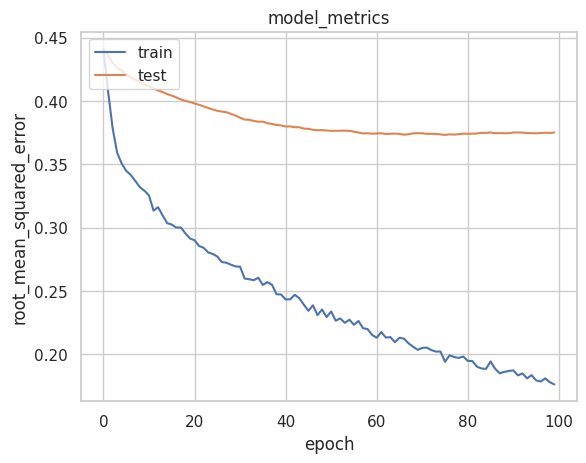

In [59]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model dievaluasi menggunakan metrik Root Mean Squared Error (RMSE), yang mengukur jarak rata-rata kuadrat antara nilai rating prediksi dan aktual. RMSE dipilih karena sesuai untuk data rating eksplisit. Berdasarkan grafik learning curve, RMSE pada data training terus menurun hingga sekitar 0.15, sedangkan pada data testing stabil di angka sekitar 0.35. Hal ini menunjukkan model belajar dengan baik namun cenderung mengalami overfitting setelah sekitar 40 epoch.